# Data Mining

## Similarity Measures

In [1]:
!pip install matplotlib.pyplot
!pip install pandas
!pip install seaborn
!pip install numpy

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for importlib-resources>=3.2.0 from https://files.pythonhosted.org/packages/25/d4/592f53ce2f8dde8be5720851bd0ab71cc2e76c55978e4163ef1ab7e389bb/importlib_resources-6.0.1-py3-none-any.whl.metadata
   ---------------------------------------- 7.5/7.5 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


### Euclidean Score

In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
#Function to compute Euclidean Distance. 
def euclidean(v1, v2):
    
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    print("diff",diff)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    print("sigma_val",sigma_val)
    
    #Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [15]:
#Define 3 users with ratings for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [16]:
euclidean(u1, u2)

diff [16 16  4  4 16]
sigma_val 56


7.483314773547883

In [17]:
euclidean(u1, u3)

diff [0 1 0 0 1]
sigma_val 2


1.4142135623730951

### Pearson Correlation

In [18]:
alice = [1,1,3,2,4]
bob   = [2,2,4,3,5]

euclidean(alice, bob)

diff [1 1 1 1 1]
sigma_val 5


2.23606797749979

In [19]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

diff [16 16  0  4  4]
sigma_val 40


6.324555320336759

In [20]:
from scipy.stats import pearsonr

pearsonr(alice, bob)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [21]:
pearsonr(alice, eve)

PearsonRResult(statistic=-1.0, pvalue=0.0)

## Clustering

### K-Means

In [22]:
#Import the function that enables us to plot clusters
from sklearn.datasets.samples_generator import make_blobs

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)


#Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50);

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:
#Import the K-Means Class
from sklearn.cluster import KMeans

#Initializr the K-Means object. Set number of clusters to 3, 
#centroid initilalization as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

#Compute the K-Means clustering 
kmeans.fit(X)

#Predict the classes for every point
y_pred = kmeans.predict(X)

#Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

In [ ]:
#List that will hold the sum of square values for different cluster sizes
ss = []

#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,9):
    
    #Initlialize the KMeans object and call the fit method to compute clusters 
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    #Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss)

In [ ]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50);

In [23]:
#Initialize K-Means Object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

NameError: name 'KMeans' is not defined

In [24]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);


NameError: name 'X_m' is not defined

## Dimensionality Reduction

### Principal Component Analysis

In [25]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [27]:
#Import PCA
from sklearn.decomposition import PCA

#Intialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [28]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [29]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


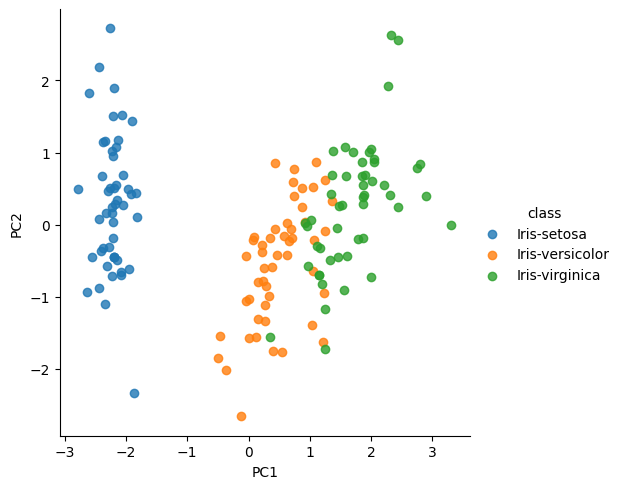

In [30]:
#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


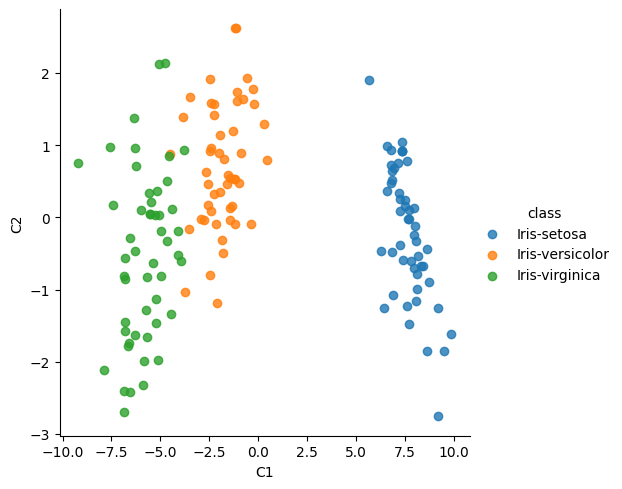

In [31]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

## Supervised Learning

### Gradient Boosting

In [32]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
#Divide the dataset into the feature dataframe and the target class series.
X, y = iris.drop('class', axis=1), iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train__",X_train)
print("X_test__",X_test)
print("y_train__",y_train)
print("y_test__",y_test)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

X_train__      sepal_length  sepal_width  petal_length  petal_width
61            5.9          3.0           4.2          1.5
92            5.8          2.6           4.0          1.2
112           6.8          3.0           5.5          2.1
2             4.7          3.2           1.3          0.2
141           6.9          3.1           5.1          2.3
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[112 rows x 4 columns]
X_test__      sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.

0.9736842105263158

<Axes: >

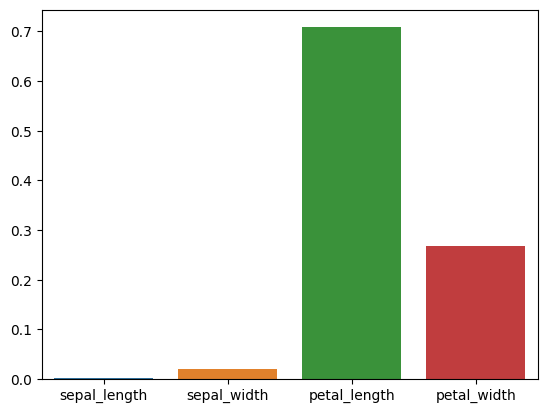

In [34]:
#Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)